In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import pandas as pd

## 3J Photovoltaic Power

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

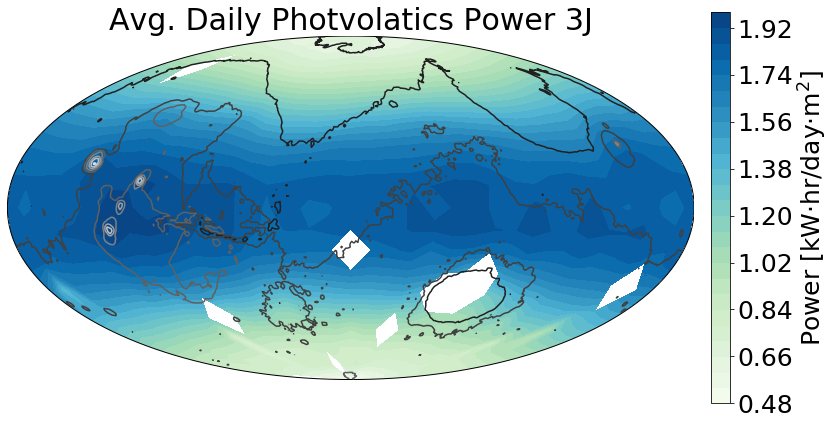

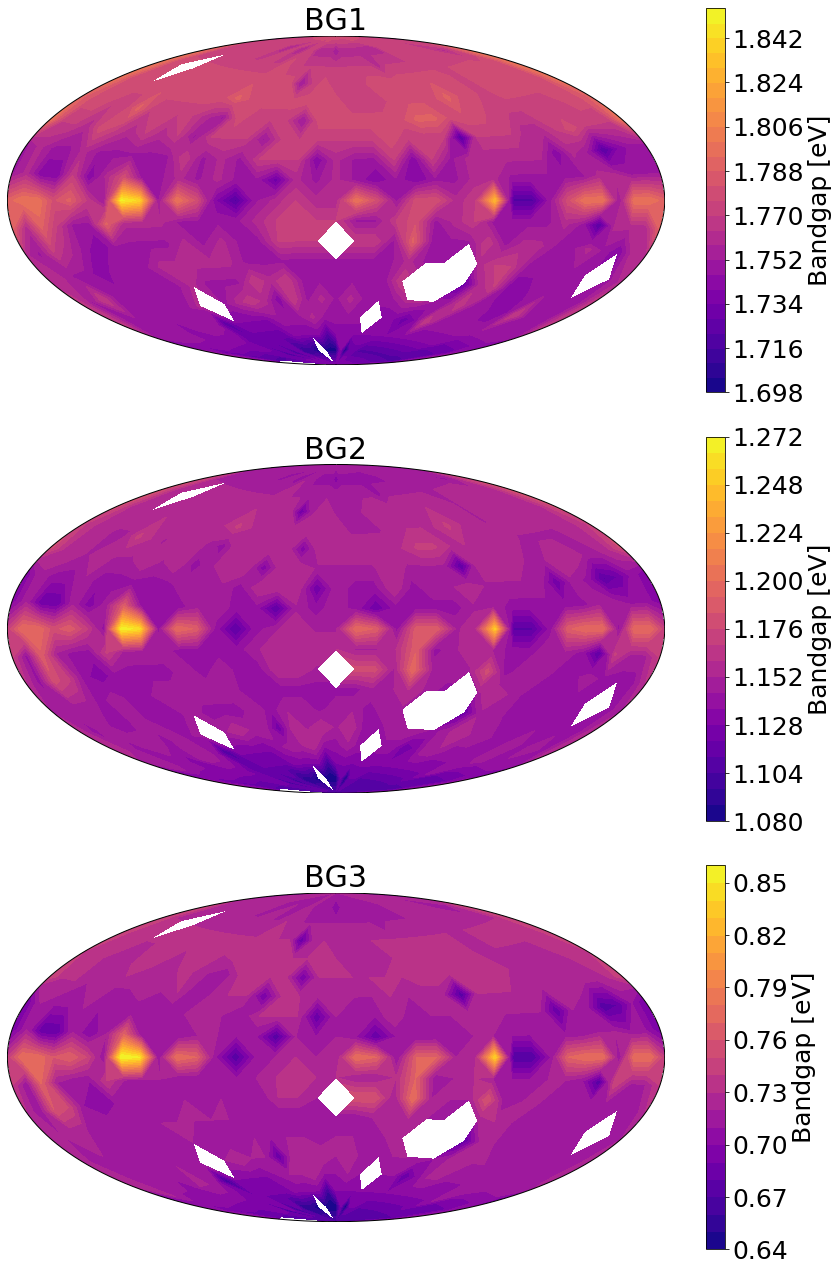

In [2]:
## 3J-PV
ds = xr.open_dataset('j3pv_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 3J-PV Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
j3pv = ds['j3pv']
cs = m.contourf(lons,lats,j3pv.transpose(), cmap='GnBu', levels=25)
plt.title(r'Avg. Daily Photvolatics Power 3J', fontsize = 30)

maxpv = np.max(ds['j3pv'])
maxargs = np.unravel_index(np.argmax(ds['j3pv']),np.shape(ds['j3pv']), order='C')
y = maxargs[0]
x = maxargs[1]
X,Y = m(ds['lon'][y],ds['lat'][x])

m.plot(x,y, marker='o',markersize=10,color='r')

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Power [kW$\cdot$hr/day$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j3pv.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j3pv-bg1', 'j3pv-bg2', 'j3pv-bg3']
tit = ['BG1', 'BG2', 'BG3']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,18))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)   
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j3pvbg.png',dpi=300,bbox_inches='tight')

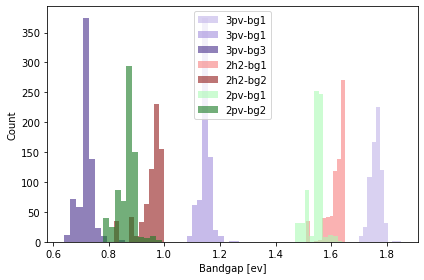

In [3]:
dsh = xr.open_dataset('j2h2_final.nc')
dsp = xr.open_dataset('j3pv_final.nc')
dsp2 = xr.open_dataset('j2pv_final.nc')
plt.hist(np.reshape(np.array(dsp['j3pv-bg1']), -1), color='#c1b3e9', label='3pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp['j3pv-bg2']), -1), color='#a38edd', label='3pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp['j3pv-bg3']), -1), color='#472e8b', label='3pv-bg3', alpha=0.6)
plt.hist(np.reshape(np.array(dsh['j2h2-bg1']), -1), color='#f78080', label='2h2-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsh['j2h2-bg2']), -1), color='#911a1a', label='2h2-bg2', alpha=0.6)
plt.hist(np.reshape(np.array(dsp2['j2pv-bg1']), -1), color='#abfab4', label='2pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp2['j2pv-bg2']), -1), color='#167922', label='2pv-bg2', alpha=0.6)
plt.legend()
plt.xlabel('Bandgap [ev]')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('bgcount.png',dpi=300,bbox_inches='tight')

In [4]:
maxpv = np.max(dsp['j3pv'])
maxargs = np.unravel_index(np.argmax(dsp['j3pv']),np.shape(dsp['j3pv']), order='C')
maxlon = maxargs[0]
maxlat = maxargs[1]
a = np.reshape(np.array(dsp2['j2pv-bg1']), -1)
a = a[~np.isnan(a)]
b = np.reshape(np.array(dsp2['j2pv-bg2']), -1)
b = b[~np.isnan(b)]
df1 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
df1['sys'] = 'j2pv'
a = np.reshape(np.array(dsh['j2h2-bg1']), -1)
a = a[~np.isnan(a)]
b = np.reshape(np.array(dsh['j2h2-bg2']), -1)
b = b[~np.isnan(b)]
df2 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
df2['sys'] = 'j2h2'
# a = np.reshape(np.array(dsp['j3pv-bg1']), -1)
# a = a[~np.isnan(a)]
# b = np.reshape(np.array(dsp['j3pv-bg2']), -1)
# b = b[~np.isnan(b)]
# df3 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
# df3['sys'] = 'j3pv'

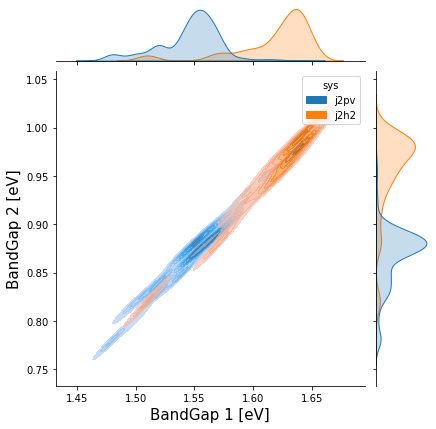

In [5]:
df = pd.concat([df1, df2],ignore_index=True)
# df = pd.concat([df1, df2, df3],ignore_index=True)
# fig = plt.figure()
# ax = fig.add_subplot(111)
p = sns.jointplot(data=df, x="bg1", y="bg2", kind="kde",hue='sys',fill=True,alpha=.6, ax=ax)
p.set_axis_labels('BandGap 1 [eV]', 'BandGap 2 [eV]', fontsize=15)
# plt.setp(p.get_legend().get_texts(), fontsize='22'
p.savefig('test.png',dpi=300)
# plt.set_xlabel('bg1',fontsize=15)

#### 2J Photoelectrochemical H2

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

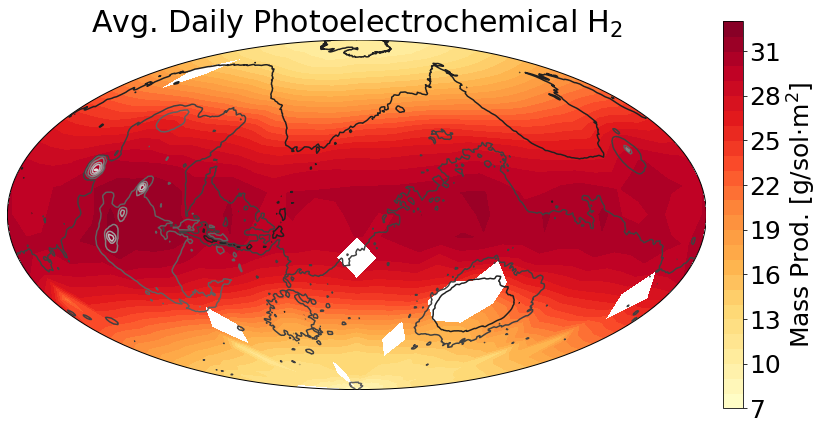

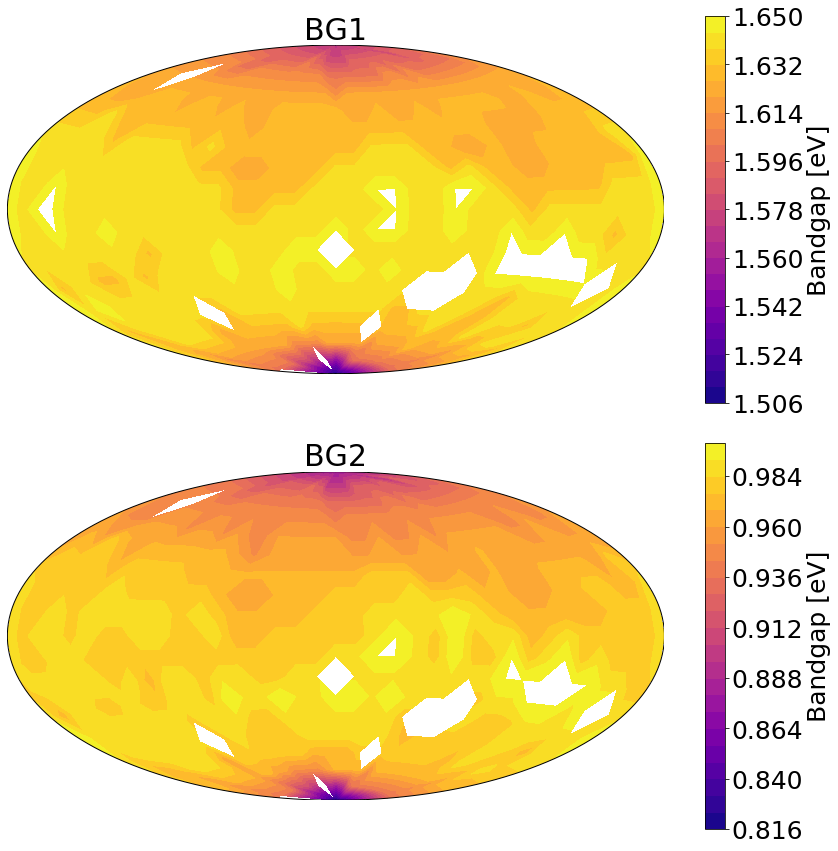

In [6]:
## 2J-H2
ds = xr.open_dataset('j2h2_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-H2 Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2h2']
cs = m.contourf(lons,lats,prod.transpose(), cmap='YlOrRd', levels=25)
plt.title('Avg. Daily Photoelectrochemical H$_{2}$', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Mass Prod. [g/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2h2.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2h2-bg1', 'j2h2-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)   
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2h2bg.png',dpi=300,bbox_inches='tight')

## J2PV

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

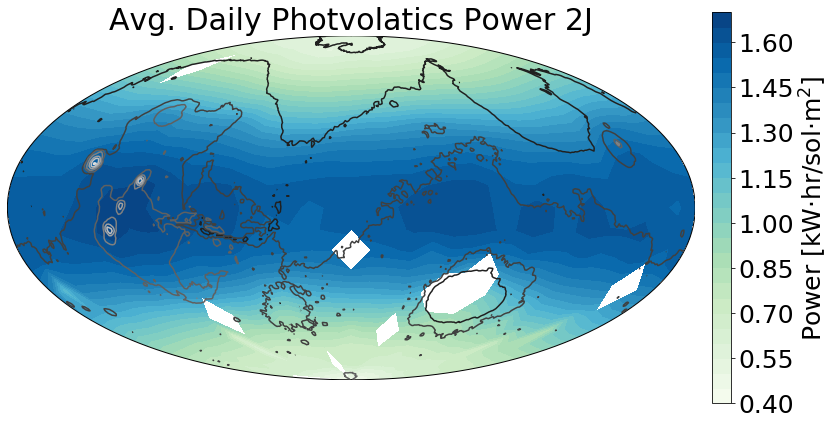

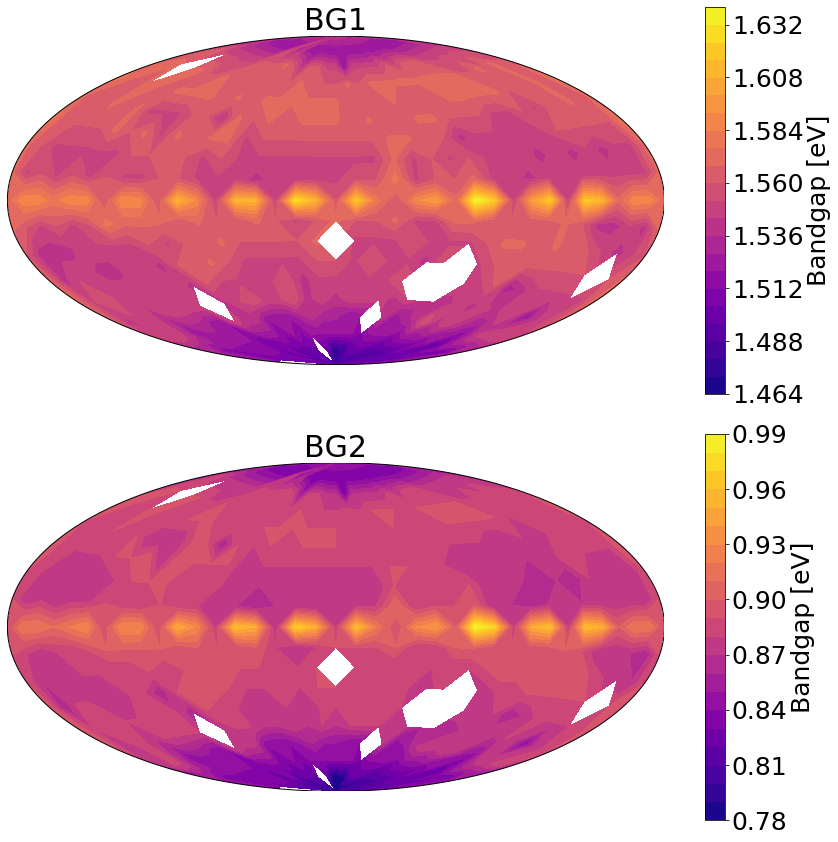

In [7]:
## 2J-H2
ds = xr.open_dataset('j2pv_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-H2 Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2pv']
cs = m.contourf(lons,lats,prod.transpose(),  cmap='GnBu', levels=25)
plt.title(r'Avg. Daily Photvolatics Power 2J', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Power [kW$\cdot$hr/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2pv.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2pv-bg1', 'j2pv-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)   
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2pvbg.png',dpi=300,bbox_inches='tight')

## Flux Error



may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

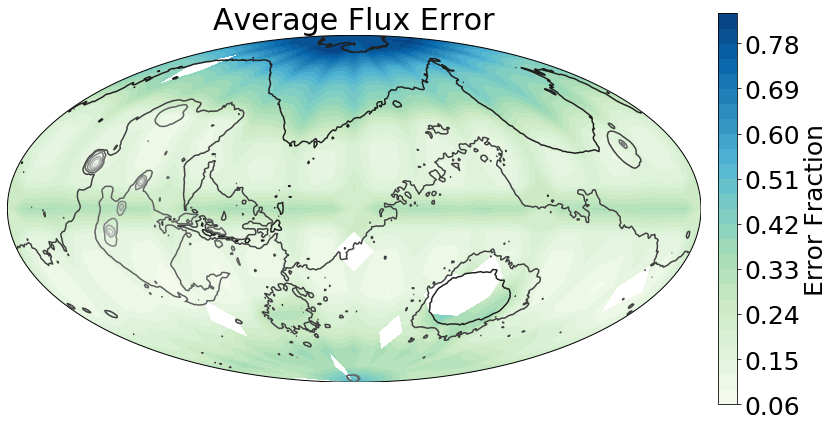

In [8]:
ds = xr.open_dataset('error.nc')
nc = xr.open_dataset('extras/surface.nc')

fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['errorFrac']
cs = m.contourf(lons,lats,prod.transpose(),  cmap='GnBu', levels=25)
plt.title('Average Flux Error', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label('Error Fraction', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()

In [10]:
def CAMassCalc(PV3val,PECH2val,t_store):
    
    #adjust to 80% of DBL (for PV only -- PEC inefficiency already account for by 700 mV)
    eta_DBL = 0.8
    
    # power and material demands
    Phab = 40
    N_dot = 8.33e-3
    M_dot = 0.61
    B_dot = 0.1
    
    # conversion factors
    a_HB = 0.196
    a_S = 0.554
    a_BP = 0.155
    a_E = 54.13
    a_FC = 0.064
    a_HS = 3.39
    
    # power and energy density
    p_K = 6.25e-3
    eta_B = 80
    p_E = 1.14e-2
    e_B = 0.16
    p_FC = 0.365
    e_HS = 7.18e-2
    
    # solar cell array mass
    m_PV = 2.0
    m_PEC = 2.4
    
    # other parameters
    chi = 0.33
    
    
    
    
    # nuclear power/mass calcs
    P_K = Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)
    mK = P_K/p_K + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP) / p_E
    
    # photovoltaic + battery calc
    
    P_PVB = (chi + (1-chi)/eta_B) * (Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP))
    
    mPVB = P_PVB / (PV3val*eta_DBL/m_PV/24.6) \
    + (Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_B \
    + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP) / p_E
    
    
    # photvoltaic + electrolyzer calc
    m_dot_H2_PVE = ((1-chi)*Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) / (1-a_HS*a_FC)
    
    P_PVE = chi*Phab + a_E*m_dot_H2_PVE
    
    mPVE = P_PVE / (PV3val*eta_DBL/m_PV/24.6) \
    + m_dot_H2_PVE / p_E \
    + (Phab+a_HS*m_dot_H2_PVE) / p_FC \
    + (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_HS
    
    
    
    # photoelectrochemical calc
    m_dot_H2_PEC = (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) / (1-a_HS*a_FC)
    
    mPEC = m_dot_H2_PEC / (PECH2val/m_PEC/24.6/1000) \
    + (Phab+a_HS*m_dot_H2_PVE) / p_FC \
    + (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_HS
    

    
    
    
    return [mK,mPVB,mPVE,mPEC];

In [11]:
dsh = xr.open_dataset('j2h2_final.nc')
dsp = xr.open_dataset('j3pv_final.nc')
dsp2 = xr.open_dataset('j2pv_final.nc')

In [12]:
j2h2val = dsh['j2h2']
j3pvval = ds['j3pv']